In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import matplotlib as mpl

In [2]:
# Loading data
data = pd.read_csv("2019 Winter Data Science Intern Challenge Data Set.csv")
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [3]:
print("Mean of order amount: ",data["order_amount"].mean())

Mean of order amount:  3145.128


# Data Cleaning

In [4]:
# Checking if there are any duplicates 
sum(data.duplicated())
sum(data["order_id"].duplicated())

0

In [5]:
data.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


## Exploring the distribution of different features
### A. Total Items

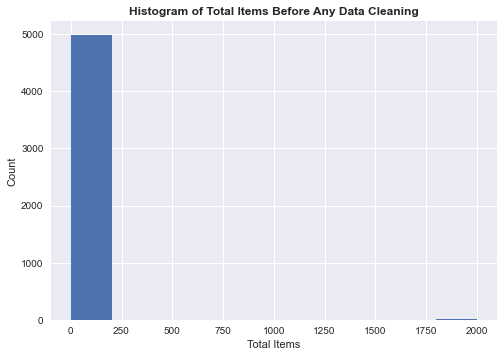

In [6]:
mpl.style.use('seaborn')
data["total_items"].hist()
plt.title("Histogram of Total Items Before Any Data Cleaning",fontweight="bold")
plt.xlabel("Total Items")
plt.ylabel("Count")
plt.show()

In [7]:
data[data["total_items"]>250].head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00


There is a user (user id: 17) who made purchases of $704000 for 2000 products for 17 times. Since typically the number of products in each purchase is less than 250 and that user made the same large purchase 17 times, the validity of the data is suspicious and further investigation is needed to examine if those entries are accurate. For the purpose of AOV analysis, I removed those suspicious entries.

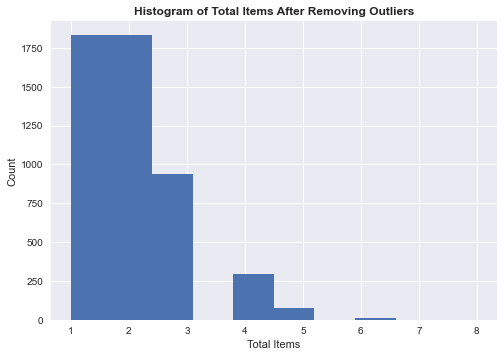

In [8]:
# removing the record that has too large total_items
data = data[data["total_items"]<250]
data["total_items"].hist()
plt.title("Histogram of Total Items After Removing Outliers",fontweight="bold")
plt.xlabel("Total Items")
plt.ylabel("Count")
plt.show()

The total items values are right-skewed with most data having 1-3 total items and a few data with large total items.

## Order Amount

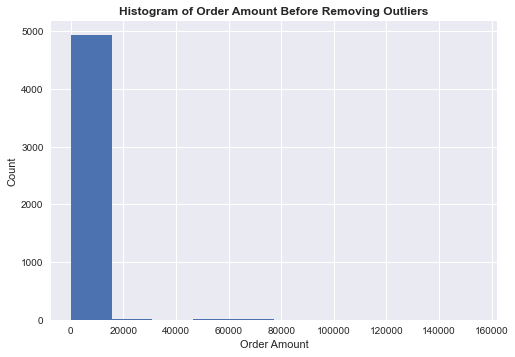

In [9]:
data["order_amount"].hist()
plt.title("Histogram of Order Amount Before Removing Outliers",fontweight="bold")
plt.xlabel("Order Amount")
plt.ylabel("Count")
plt.show()

In [10]:
# Investigating data with order amounts exceeding 2000
data[data["order_amount"]>2000].head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57
490,491,78,936,51450,2,debit,2017-03-26 17:08:19
493,494,78,983,51450,2,cash,2017-03-16 21:39:35
511,512,78,967,51450,2,cash,2017-03-09 7:23:14
617,618,78,760,51450,2,cash,2017-03-18 11:18:42


All the large order amount purchases are made in the shop with id 78, this seems to be an outlier. So I also removed the related entries from the dataset.

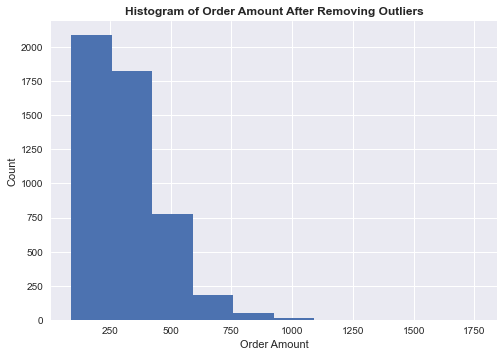

In [11]:
data = data[data["shop_id"]!=78]
data["order_amount"].hist()
plt.title("Histogram of Order Amount After Removing Outliers",fontweight="bold")
plt.xlabel("Order Amount")
plt.ylabel("Count")
plt.show()

The order amount is right-skewed with most data having values less than 500 and a few data with large total items. So the mean of order amount is not a good measures as it overstates the order values. 

### Data Creation Datetime

In [12]:
# The start and end dates look reasonable
data["created_at"] = pd.to_datetime(data["created_at"])
data["day"] = data["created_at"].dt.day
data["hour"] = data["created_at"].dt.hour

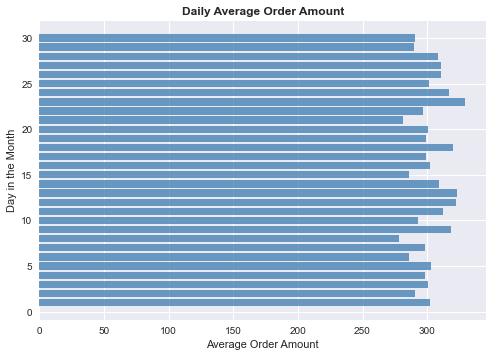

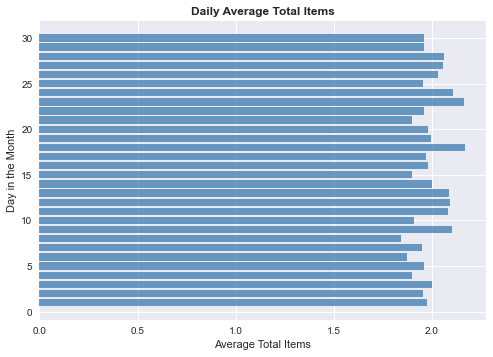

In [13]:
#Exploring if there is any trend over the month
daily_stat = data.groupby("day").mean()

plt.barh(daily_stat.index, daily_stat["order_amount"], facecolor='steelblue', alpha=0.8)
plt.title('Daily Average Order Amount',fontweight="bold")
plt.ylabel('Day in the Month')
plt.xlabel('Average Order Amount')
plt.show()

plt.barh(daily_stat.index, daily_stat["total_items"], facecolor='steelblue', alpha=0.8)
plt.title('Daily Average Total Items' ,fontweight="bold")
plt.ylabel('Day in the Month')
plt.xlabel('Average Total Items')
plt.show()

There are no obvious trends in day in the month and the data looks reasonable with no overly small/ large values.

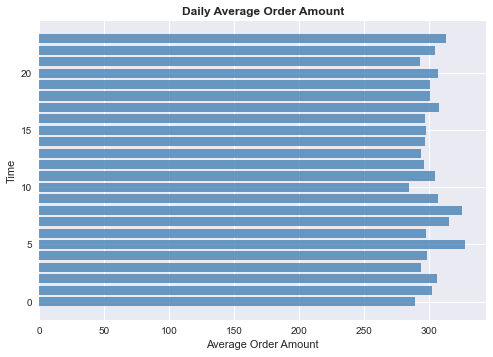

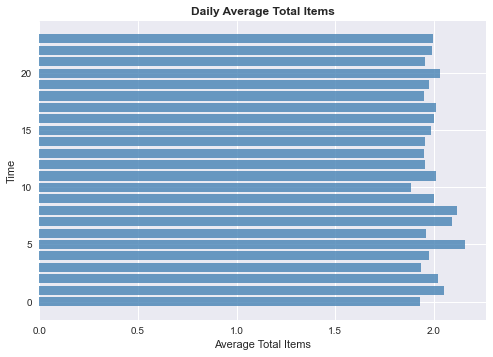

In [14]:
#Exploring if there is any trend in terms of purchase hour
hourly_stat = data.groupby("hour").mean()

plt.barh(hourly_stat.index, hourly_stat["order_amount"], facecolor='steelblue', alpha=0.8)
plt.title('Daily Average Order Amount',fontweight="bold")
plt.ylabel('Time')
plt.xlabel('Average Order Amount')
plt.show()

plt.barh(hourly_stat.index, hourly_stat["total_items"], facecolor='steelblue', alpha=0.8)
plt.title('Daily Average Total Items',fontweight="bold")
plt.ylabel('Time')
plt.xlabel('Average Total Items')
plt.show()

Once again, there are no obvious trends in terms of time and the data looks reasonable with no overly small/ large values.

### Payment Method

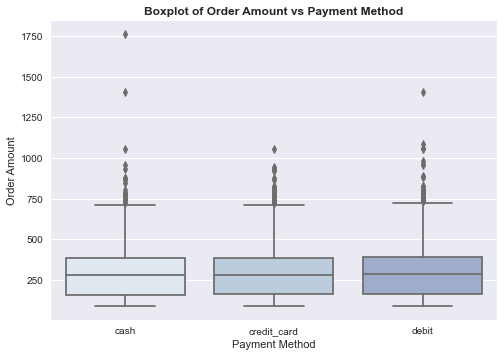

In [15]:
sns.set_palette(sns.color_palette("BuPu"))
sns.boxplot(x='payment_method',y='order_amount',data=data)
plt.title('Boxplot of Order Amount vs Payment Method',fontweight="bold")
plt.ylabel('Order Amount')
plt.xlabel('Payment Method')
plt.show()

The distributions of order amount with various payment methods are similar.

# Question 1A
Based on my data cleaning process and descriptive analysis, the current calculation has the following problem.
- The outliers in order amount and total items are not handled and mean is sensitive to outliers. The outlier should be removed when estimating the average order value.
- The order amount data is right skewed with a few large order amounts. The AOV is sensitive to those large amounts and overstate the order value.

# Question 1B
Median order value should be used because it is less sensitive to the skewed data.

# Question 1C

In [16]:
print("Median Order Value: $", data["order_amount"].median())

Median Order Value: $ 284.0
